# <font color='black'>Introduction aux systèmes radar</font>

---

<img src="images/logo.png" width="100" align="right">


> Year: **2022**
>
> Version: **1.0**


## <font color='black'>Introduction</font>

---

Un RADAR (RAdio Detection And Ranging) est un système de détection électromagnétique (EM) et de mesure de distance. Son principe est analogue aux systèmes d'écholocation qu'utilisent certains animaux évoluant en milieu obscurs (chauve-souris, cétacés). La différence principale est que l'on utilise une onde EM et non sonore.

Le radar émet donc une impulsion EM de forte puissance. Celle-ci se propage jusqu'à rencontrer un éventuel obstacle. Il réfléchit l'onde dont une partie est recueillie sur l'antenne du radar. La mesure du temps de vol entre l'onde émise et l'onde reçue permet d'estimer la distance de la cible.

<img src="images/rad_fig1.png" width="500">


Ce système est donc actif, ce qui lui procure des avantages par rapport aux systèmes de détection et de mesures passifs (optiques, par exemple) nécessitant une source extérieure au système (soleil, par exemple). De plus, en fonction de la bande du spectre EM choisie pour émettre, le système sera capable de «voir» à travers certains milieux opaques à la lumière visible (nuages, brouillard) et même pénétrer la matière sur une certaine profondeur (détection de mines enfouies, ...). Enfin, comme on maitrise l’onde émise, on a directement accès à des mesures précises de distances, contrairement aux systèmes passifs.


Le champ d’application de tels systèmes est donc très vaste. Historiquement, les applications sont militaires (veille contre les attaques aériennes, détections de navires, autodirecteurs de missiles, cartographie de terrains, ...). Dans le monde civil, on peut citer la navigation aérienne et maritime, la météorologie, l’altimétrie, les systèmes de freinage d’urgence pour véhicules automobiles, ...).

## Emission d’une impulsion unique, cible fixe

Nous allons tout d’abord nous placer dans le cas le plus simple d’objets à détecter immobiles.

### Modélisation des signaux émis et reçus


Dans un premier temps, le signal émis, $e(t)$, sera une simple impulsion de durée $T = 1$ ms, modulée par une fréquence porteuse constante $f_0 = 40$ KHz, comme représenté sur la figure ci-dessous:

<img src="images/rad_fig2.png" width="500">


Le signal reçu sur l’un des récepteurs, $r(t)$, sera une réplique de $e(t)$ atténuée et décalée dans le temps d’une valeur $\tau_0$.

#### Question 1

Donner l’expression de $\tau_0$ en fonction de la distance $d$ entre la cible et le radar et $c$ la célérité des ondes.

---


**Réponse 1**

La distance parcourue par l'onde est : $2d \:$ (car l'onde fait un aller-retour)

On a donc :
$$
c = \frac{2d}{\tau_0}
$$
D'où,
$$
\boxed{\tau_0 = \frac{2d}{c}}
$$

Les signaux réels, émis et reçus sont tout d’abord convertis en leurs signaux analytiques correspondants.

>##### Signal analytique, transformée de Hilbert 
>La transformée de Fourier $X(f)$ d’un signal réel $x(t)$ est à symétrie hermitienne (module pair et phase impaire). L'observation de la transformée de Fourier seulement sur les fréquences positives suffit donc à reconstruire le signal sans perte d'information. 
>
>On peut ainsi définir le signal analytique associé par 
>
> $$X_a(f) = 2 U(f) X(f)$$
>
>où $U(f)$ est l’échelon unité. Celui-ci est un signal complexe $x_a(t) = x(t) + i \hat x(t)$ dont la partie réelle est le signal d’origine $x(t)$. Dans le cas des signaux à bande étroite (dont l’excursion fréquentielle est faible autour d’une fréquence centrale), la partie imaginaire, appelée Transformée de Hilbert correspond à la composante en quadrature par rapport à $x(t)$ (déphasée de $\pi/2$)



#### Question 2

Vérifier que $\Re[x_a(t)] = x(t)$ en calculant $\mathcal F [\Re[x_a(t)]]$.
De même, donner la fonction de transfert fréquentielle correspondant à la transformée de Hilbert en calculant $\mathcal F [\Im[x_a(t)]]$ . En déduire que la transformée de Hilbert correspond à un filtre déphaseur pur de $\cfrac{\pi}{2}$.
Calculer la transformée de Fourier du signal émis, $e(t)$. En déduire l’expression du signal analytique associé, $e_a(t)$.

---

**Réponse 2**

----
**Calcuclons $\Re[x_a(t)]$**

$\mathcal F [\Re[x_a(t)]] = \frac{X_a(f) + X_a^*(-f)}{2} \: = \: U(f) X(f) + U^*(-f) X^*(-f) \: = \: U(f) X(f) + U(-f) X(f)$

(La dernière égalité se justifie par le fait que $U(f)$ est l’échelon unité, une fonction réelle, et par la parité du module et l'imparité de l'argument de $X(f)$)

Or $U(f)$ est l’échelon unité donc on a :

$ U(f)+U(-f) \: = \: 1 $

On obtient finalement :  

$$\boxed{\mathcal F [\Re[x_a(t)]] \: = \: (U(f)+U(-f)) X(f) \: = \: X(f)}$$

On obtient alors le résultat souhaité en passant à la transformée inverse : $\Re[x_a(t)] = x(t)$

----
**Calcuclons $\mathcal F [\Im[x_a(t)]]$**

$\mathcal F [\Im[x_a(t)]] \: = \: \mathcal F [\frac{x_a(t) - x_a^*(t)}{2i}] \: = \: -i(U(f) X(f) - U^*(-f) X^*(-f)) \: = \: -i\:X(f)(U(f-U(-f))$

(La dernière égalité se justifie de la même manière que dans le calcul précédent)

Or $U(f)$ est l’échelon unité donc on a :

$ U(f)-U(-f) \: = \: sgn(f) $ où $sgn(f)$ est la fonction qui vaut $1$ lorsque $f > 0$ et $-1$ lorsque $f < 0$.

Donc on obtient : 

$$\boxed{\mathcal F [\Im[x_a(t)]] \: = \: -i\:sgn(f)\:X(f)}$$

La fonction de transfert du filtre de Hilbert est donc :

$$\boxed{H(f) \: = \: -i\:sgn(f)}$$ ce qui correspond bien à un filtre déphaseur pur de $\cfrac{\pi}{2}$ (car le module de $H(f)$ vaut 1).

-----
**Calculons $\mathcal F [e(t)]$**

(Dans les calculs suivant $\Pi_T(t)$ désigne la porte entre $0$ et $T$)

$\mathcal F [e(t)]\: = \: \mathcal F [\Pi_T(t)\:cos(2\pi f_0 t)] \: = \: \mathcal F [\Pi_T(t)] \:* \: \mathcal F [cos(2\pi f_0 t)] \: = \: T \: sinc(\pi f T) \: * \: \frac{1}{2}(\delta(f-f_0) \:+\: \delta(f + f_0))$

$$\boxed{ \mathcal F [e(t)]\: = \: \frac{1}{2\pi}[\frac{sin(\pi (f-f_0) T)}{f-f0} \: +\: \frac{sin(\pi (f+f_0) T)}{f+f0}]}$$

Avec les questions précédentes on a que : 

$e_a(t) \: = \: e(t) \: + \: i\hat e(t) \: = \: \Pi_T(t)cos(2\pi f_0 t) + i \Pi_T(t)cos(2 \pi f_0 t + \pi/2) \: = \: \Pi_T(t)e^{2i\pi f_0 t}$

$$\boxed{e_a(t) \: = \: \Pi_T(t)e^{2i\pi f_0 t}}$$

L’intérêt de convertir les signaux réels en leurs équivalents complexes réside dans le fait que tout déphasage sera vu comme une simple multiplication par un nombre complexe. Il est ainsi plus facile d’extraire et de traiter la phase de 
$x_a(t) = \alpha e^{i \varphi} e^{2 i \pi f_0 t}$ que de $x(t) = \alpha \cos (2 i \pi f_0 t + \varphi)$

### Numérisation des signaux

Ces signaux complexes sont ensuite échantillonnés à une fréquence $f_s = 9.5$ KHz (environ), ne respectant pas le théorème de Shannon. Cela permet de démoduler (diminution de la fréquence porteuse) les signaux et de réduire la taille des vecteurs à traiter. 

> #####  Théorème de Shannon – Repliement de spectre (aliasing)
>
>Le fait d’échantillonner un signal continu à une cadence $f_s$ entraine une périodisation de sa transformée de Fourier à la période $f_s$ Ainsi, si l’on veut retrouver, sans ambiguïté le signal continu d’origine, il faut échantillonner à une cadence strictement supérieure à 2 fois la fréquence maximale contenue dans le signal d’origine.
>
>Si cette condition de Shannon n’est pas respectée, une partie de l’information sera perdue et le signal sera modifié. Dans le cas d’un signal à bande étroite, si l’on choisit une fréquence d’échantillonnage supérieure à la bande mais inférieure à la fréquence porteuse, le repliement de spectre engendré modifie seulement la fréquence porteuse apparente et est assimilable à une démodulation.

#### Question 3
Quelle sera la fréquence apparente des signaux échantillonnés ?

---

 **Réponse 3**

La fréquence $f_0 = 40 KHz$ n'appartient pas à l'intervalle $[-f_s/2 , f_s/2]$ donc il y a un phénomène de repli spectral.
On cherche $f$ et $n \in \mathbb{N}$ tel que $f - n f_s \in \{\pm 40 KHz\} $

On a alors $f \in \{ -2, 2 \}$.

La fréquence apparente des signaux échantillonés est de $ 2 KHz$.
 

### Estimation de la distance


Nous avons vu dans la partie précédente, que le but premier d’un radar était de détecter et d’estimer la distance des objets environnants. Pour cela, la méthode optimale est d’effectuer l’intercorrélation entre le signal reçu et le signal émis.

> ##### Autocorrélation - Intercorrélation
>
> On sait que l’énergie se conserve par transformée de Fourier (théorème de Parseval) :
>
> $$ \int_{-\infty}^{+\infty} |x(t)|^2 dt = \int_{-\infty}^{+\infty} |X(f)|^2 df $$
>
> On peut ainsi définir une densité spectrale d’énergie :  $\Phi_x (f) = |X(f)|^2$.
>
>
> Par transformée de Fourier inverse, on a :
> $$ \mathcal F^{-1} [|X(f)|^2] = x(t) * x^*(-t) = \int_{-\infty}^{+\infty}  x(t)\, x^*(t-\tau) dt $$
>
>C’est la fonction d’autocorrélation, notée :
> $$ R_x(\tau) = \int_{-\infty}^{+\infty}  x(t)\, x^*(t-\tau) dt $$
>
> Elle mesure la ressemblance d’un signal $x(t)$ avec sa réplique décalée en temps. Cette fonction est à symétrie hermitienne et maximale en 0. 
>
> On peut généraliser cette fonction à l’intercorrélation entre 2 signaux :
> $$ R_{xy}(\tau) = \int_{-\infty}^{+\infty}  x(t)\, y^*(t-\tau) dt = x(t) * y^*(-t) = \mathcal F^{-1} [X(f)Y^*(f)] $$
>
>Pour les signaux discrétisés en temps, on utilise la formulation suivante :
> $$ R_{xy}[k] = \sum_{n = -\infty}^{+\infty} x[n] y^*[n-k] $$

> ##### Algorithme de FFT
> L’algorithme dit de Fast Fourier Transform (FFT) dû à Cooley et Tukey (1965) consiste à scinder la transformée de Fourier du vecteur initial de taille N en transformées de Fourier de taille N/2. On peut ainsi se ramener successivement à des transformées de Fourier élémentaires de taille 2 permettant de passer d’une charge calculatoire en $O(N^2)$ avec l’algorithme « naïf » (produit matriciel) à une charge calculatoire en $O(Nlog_2(N))$.

#### Question 4
En supposant que $r_a(t) = \alpha e_a(t - \tau_0)$ où $\alpha$ est un nombre complexe inconnu, exprimer l’intercorrélation $R_{r_a e_a}(\tau)$ en fonction de l’autocorrélation de $e_a(t)$. Calculer et tracer la fonction d’autocorrélation de $e_a(t)$ .

---

**Réponse 4**

\begin{align}
R_{r_a e_a}(\tau) &= \int_{-\infty}^{+\infty}  {r_a}(t)\, {e_a}^*(t-\tau) dt \\
                  &= \alpha \int_{-\infty}^{+\infty}  {e_a}(t-\tau_0)\, {e_a}^*(t-\tau) dt \\
                  &= \alpha \int_{-\infty}^{+\infty}  {e_a}(t-\tau_0)\, {e_a}^*(t-\tau_0 + \tau_0 - \tau)dt \\
                  &= \alpha \int_{-\infty}^{+\infty}  {e_a}(u)\, {e_a}^*(u-(\tau - \tau_0)) du \\
                  &= \alpha R_{e_a}(\tau - \tau_0)
\end{align}

On a (dans le calcul suivant $\Pi_T(t)$ désigne la porte entre $0$ et $T$): 
$$ R_{e_a}(\tau) = \int_{-\infty}^{+\infty}  e_a(t)\, e_a^*(t-\tau) dt = \int_{-\infty}^{+\infty} \Pi_T(t) e^{2i\pi f_0t}\Pi_T(t - \tau) e^{-2i\pi f_0(t-\tau)} dt = \int_{-\infty}^{+\infty} e^{2i\pi f_0\tau}\Pi_T(t) \Pi_T(t - \tau) dt = e^{2i\pi f_0\tau} (\Pi_T * \Pi_T)(\tau)$$

Les deux portes conditionnent les valeurs de $ R_{e_a}$. On a :
- pour $\tau < -T, R_{e_a}(\tau) = 0 $
- pour $\tau > T, R_{e_a}(\tau) = 0 $
- pour $\tau \in [-T, T], R_{e_a}(\tau) = (T - |\tau|)e^{2i\pi f_0\tau}$ 

Donc $$ \boxed{R_{e_a}(\tau) = (T - |\tau|) \Pi_{2T}(\tau)e^{2i\pi f_0\tau}}$$ (ici $\Pi_{2T}(t)$ désigne la porte centrée entre $-T$ et $T$)



/Applications/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2249: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


<IPython.core.display.Javascript object>


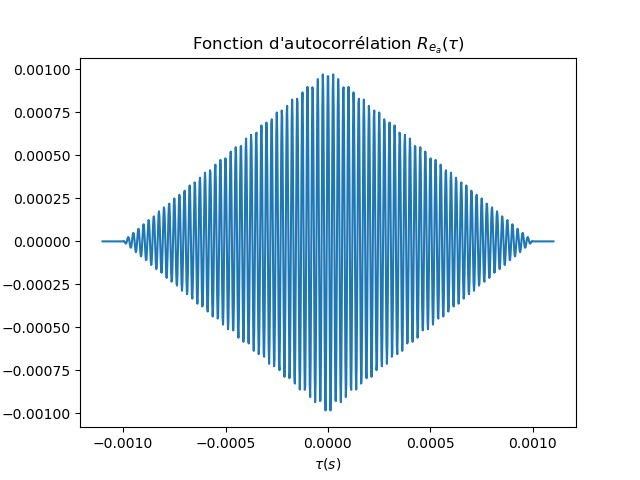

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

T = 1e-3
f0 = 40000

def R_ea(tau) : 
    if abs(tau) > T:
        return 0.
    return (T - abs(tau))*np.exp(2j * np.pi * f0 * tau)

time = np.linspace(-1.1e-3, 1.1e-3, 1000)
Rea = np.vectorize(R_ea)

plt.plot(time, Rea(time))
plt.title("Fonction d'autocorrélation $R_{e_a}(\u03C4)$")
plt.xlabel("$\u03C4 (s)$")
plt.show()

#### Code 1 - Une impulsion non modulèe en fréquence 

Le fichier « signal1.mat » correspond à un enregistrement des signaux analytiques émis et reçus sur une scène réelle.
* Observer l’allure temporelle de ces signaux et vérifier la valeur de la fréquence observée.
* Calculer et tracer la fonction d’intercorrélation.
* Essayer d’identifier le nombre de cibles présentes ainsi que leur distance. Essayer de définir une résolution du système (distance minimale à partir de laquelle on peut voir 2 cibles). Relier cette résolution à la durée de l’impulsion émise T.

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

c = 340    # célérité des ondes sonores 
f0 = 40E3  # fréquence porteuse
T = 1E-3   # durée de l'impulsion

/Applications/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No handles with labels found to put in legend.
/Applications/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No handles with labels found to put in legend.


Text(0.5, 1.0, 'représentation de corr_fft')

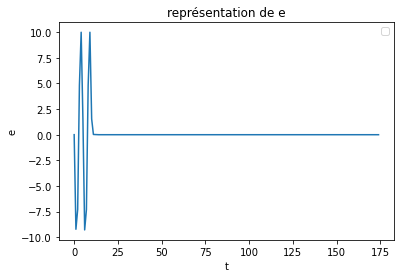

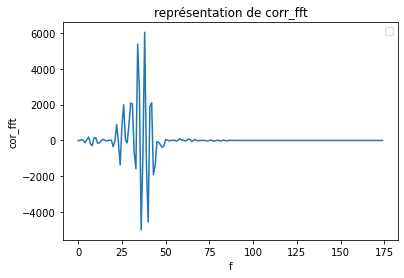

In [7]:
data = scipy.io.loadmat('data/signal1.mat') # chargement du fichier de données

e = data['e']
r = data['r']
Fs = data['Fs']
N = len(r)                                # nombre de points du signal
d = c * np.arange(0,N)/Fs/2             # axe distance (metres)

cor_fft = np.fft.fft(r, axis = 0)*np.conj(np.fft.fft(e, axis = 0))            # calcul de la corrélation par FFT
resol_theorique = c*T/2                    # résolution théorique

#tracés
plt.figure()
plt.plot(e)
plt.legend()
plt.xlabel('t')
plt.ylabel('e')
plt.title('représentation de e')

#tracés
plt.figure()
plt.plot(cor_fft)
plt.legend()
plt.xlabel('f')
plt.ylabel('cor_fft')
plt.title('représentation de corr_fft')

Le pouvoir de résolution du système en utilisant cette forme d’onde basique (impulsion modulée par une fréquence constante) ne permet pas de distinguer 2 objets proches. L’amélioration de la résolution du système passe par la réduction du temps d’impulsion. Malheureusement, cette diminution va à l’encontre de la portée du système qui est proportionnelle à l’énergie émise. La solution classiquement employée pour diminuer la résolution sans sacrifier la portée est d’augmenter la bande du signal émis. Nous allons donc maintenant utiliser une onde modulée linéairement en fréquence, comme représentée sur la figure suivante. La fréquence varie de 38 à 42 KHz (soit une bande $𝐵 = 4$ KHz autours de $f_0$).

<img src="images/rad_fig3.png" width="500">

#### Question 5

Quelles vont être les fréquences observées après échantillonnage à $f_s = 9.5$ KHz ? Si l’on suppose que la transformée de Fourier de $e_a(t)$ est proportionnelle à un rectangle de largeur $𝐵$ centré sur $f_0$ ( $\Pi_B \left(f - f_0)\right)$ ), calculer la largeur de la fonction d’autocorrélation du signal émis. En déduire la résolution théorique du système.

---


#### Code 2 - Une impulsion modulée en fréquence

Le fichier « signal2.mat » correspond à un enregistrement de ces signaux modulés en fréquence sur la même scène que précédemment.
*   Calculer et tracer la fonction d’intercorrélation.
*   Essayer d’identifier le nombre de cibles ainsi que leur distance. Comparer à la résolution théorique calculée au-dessus.


In [ ]:
from scipy.signal import find_peaks
B = 4E3 #bande de fréquence

data = scipy.io.loadmat('data/signal2.mat')
e = data['e']
r = data['r']
Fs = data['Fs']
N = len(r)                                # nombre de points du signal
d = c * np.arange(0,N)/Fs/2               # axe distance (metres)

cor_fft = None                            # calcul de la corrélation par FFT
peaks = find_peaks(None)                  # identification des pics de la fonction d'intercorrélation
resol_theorique = None

#tracés
plt.figure(), plt.plot(None)
plt.legend()
plt.xlabel(None)
plt.ylabel(None)
plt.title(None)

## Emission d’un train d’impulsions, cible mobile

### Modélisation des signaux émis et reçus

Nous allons maintenant considérer que les cibles visées peuvent être mobiles. Nous supposerons le vecteur vitesse constant durant le temps de mesure (quelques dixièmes de secondes).

#### Question 6

Montrer que le retard de propagation peut maintenant s’exprimer comme suit $\tau (t) \approx \cfrac{2 d_0}{c} + \cfrac{2 V_r}{c} t $ en fonction de la position initiale $d_0$ de la cible et de sa vitesse radiale $V_r$. Si l’on note $e_a(t) = \beta(t) e^{2 i \pi f_0 t }$, donner l’expression du signal reçu. Montrer que celui-ci peut se
mettre sous la forme suivante : $r_a(t) = \alpha e_a(t - \tau_0) e^{- 2 i \pi f_d t}$ si l’on néglige l’effet de la vitesse sur le terme $\beta(t)$. Donner l’expression de la fréquence Doppler : $f_d$.

---

### Estimation de la distance et de la vitesse

Le signal émis est maintenant un train de 8 impulsions successives espacées de 𝑇𝑟, comme représenté sur la figure suivante.
<img src="images/rad_fig4.png" width="500">

Pour faciliter l’estimation jointe de la distance et de la vitesse d’une cible, on convertit les vecteurs correspondants aux signaux émis et reçus en matrices où chaque ligne correspond à une récurrence. Ces matrices comporteront donc 8 lignes dans notre cas de figure.
<img src="images/rad_fig5.png" width="500">


#### Question 7

Que se passerait-il si le retard de propagation est supérieur à $T_r$ ? Définir la portée maximale mesurable sans ambiguïté.

---

Le traitement pour estimer la distance se fait, comme précédemment par corrélation, mais sur chaque ligne maintenant.

<img src="images/rad_fig6.png" width="500">


La corrélation étant une opération linéaire, le terme de rotation de phase due à la vitesse de la cible n’est pas modifié. Cette fréquence (rotation de la phase de récurrence à récurrence) qui n’est autre que l’effet Doppler pourra donc être estimé par une transformée de Fourier sur l’axe des récurrences. Celle-ci fera alors apparaitre un pic à la fréquence Doppler correspondante.

#### Question 8 

Par application du théorème de Shannon, déterminer la fréquence maximale observable sans ambigüité. En déduire la vitesse maximale mesurable. Montrer que le produit entre la distance maximale et la vitesse maximale mesurables sans ambigüité ne dépend pas des paramètres de la forme d’onde.

---


#### Code 3 - Train d'impulsions modulées en fréquence

Le fichier « signal3.mat » correspond à un enregistrement de signaux sur une cible mobile. Représenter la cartographie distance/vitesse définie précédemment. En déduire la position et la vitesse de la cible.


In [ ]:
data = scipy.io.loadmat('data/signal3.mat')

e = data['e']
r = data['r']
Fs = data['Fs']
Nbrec = data['Nbrec']
Tr = data['Tr']

N = Tr * Fs                              # Nombre de points par récurrence
e = np.reshape(e,(int(Nbrec),int(N))).T  # Conversion du vecteur de Nbrec récurrences en une matrice N x Nbrec
r = np.reshape(r,(int(Nbrec),int(N))).T  # Conversion du vecteur de Nbrec récurrences en une matrice N x Nbrec

d = c * np.arange(0,N)/Fs/2                   # axe distance (metres)
fd = np.arange(0,Nbrec)/float(Nbrec)/Tr              # axe fréquence Doppler (Hz)
v = fd*c/2/f0*100                               # conversion des fréquences Doppler en vitesses (cm/s)

cor = None             # calcul de la corrélation par FFT
cor_dop = None         # calcul de la FFT Doppler
d_cible = None
v_cible = None         #calcul du maximum de corrélation (estimation de la distance et de la vitesse)

#tracés
plt.figure(),
plt.imshow(None)
plt.xlabel(None)
plt.ylabel(None)
title(None)

Dans notre application, la vitesse de l’objet cible ne nous intéresse pas directement. Par contre, la scène vue par le radar peut comporter d’autres échos possédant une vitesse nulle (on appelle ces échos indésirables le clutter). On peut alors exploiter l’information de Doppler pour éliminer les cibles possédant un Doppler nul. On appelle ce type de filtre, un filtre MTI (Moving Target Indicator).

> ##### Filtrage
>Un filtre $R$ est un système linéaire invariant temporellement. Il est ainsi caractérisé par sa réponse impulsionnelle, $h[n] = R[\delta[n]]$. La sortie temporelle $y[n]$ sera alors le produit de convolution de cette réponse impulsionnelle et de l’entrée $x[n]$:
>
> $$ y[n] = \sum_{k = -\infty}^{+\infty} x[k] h[n-k] = x * h = h * x = \sum_{k = -\infty}^{+\infty} h[k] x[n-k] $$
>
> Par transformée en Z, on sait que ce produit de convolution se transforme en produit simple :
>
> $$ Y(Z) = H(Z) X(Z) $$ 
>
> On peut alors également caractériser le filtre par sa fonction de transfert : $H(Z) = TZ[h[n]]$\\
qui peut être calculée simplement par $H(Z) = \cfrac{Y(z)}{X(Z)}$
> Dans le cas particulier où $x[n] = e^{2 i \pi \tilde{f}n}$ la sortie temporelle s’écrit :
>
>$$ y[n] = \sum_{k = -\infty}^{+\infty} h[k] x[n-k] = e^{2 i \pi \tilde{f}n} \sum_{k = -\infty}^{+\infty} h[k] e^{-2 i \pi \tilde{f}k} = x[n] H(e^{2 i \pi \tilde f})$$
>Autrement dit, une exponentielle complexe est simplement multipliée par un nombre complexe à la traversée d’un système linéaire (c’est une fonction propre). Ce nombre complexe, n’est autre que la fonction de transfert où l’on a limité $Z$ au cercle unité. $Z(= e^{2 i \pi \tilde f})$.Ainsi, la représentation de $H(e^{2 i \pi \tilde f})$ en fonction des fréquences permet d’analyser le gain (module) et le déphasage (argument) subis par les composantes fréquentielles non amorties. C’est le diagramme de Bode.


Le filtre MTI le plus simple est $H_2(Z) = \cfrac{1 - z^{-1}}{2}$. On utilise classiquement ce type de filtre en
cascade dans les systèmes réels : $H_M(Z) = \left(\cfrac{1 - z^{-1}}{2}\right)^{M-1}$.

#### Question 9

 Tracer le comportement fréquentiel du module et de la phase de $H_2(Z)$. Généraliser à $H_M(Z)$. Calculer la fréquence de coupure de ce filtre. En déduire la vitesse « de coupure » correspondante.

---


#### Question 10

Etudier et tracer le comportement fréquentiel de $G_M(Z) = \cfrac{\sum_{k=0}^{M-1}z^{-k}}{M}$. Montrer que le
changement de variable $Z \to -Z$ permet de passer à filtre passe-haut ($G_M(Z) = G_M(-Z)$). En déduire la fréquence de coupure de ce dernier filtre.

---


Pour finir, on s’intéresse à une autre classe de filtres MTI : $T_M(Z) = 1 - \cfrac{\sum_{k = 0}^{M-1}z^{-k}}{M}= 1 - G_M(Z)$. 

####Code 4 - Tracé des gains des filtres MTI
Comparer les filtres MTI précédents à partir des tracés de leurs réponses fréquentielles.


In [ ]:
Npts=100 # Nombre de points des tracés
M=8      #Taille des réponses impulsionnelles

h2 = None # Réponse impulsionnelle du filtre H2
h8 = None # Réponse impulsionnelle du filtre H8
g2 = None # Réponse impulsionnelle du filtre G2
g8 = None # Réponse impulsionnelle du filtre G8
t2 = None # Réponse impulsionnelle du filtre T2
t8 = None # Réponse impulsionnelle du filtre T8

from scipy import signal 
w,h2 = signal.freqz(h2,1,Npts) # Calcul de la fonction de transfert associée
w,h8 = None
w,g8 = None
w,t8 = None

vrad = c/(4*np.pi*f0*Tr)*w*100 # Conversion pulsation réduite en vitesse radiale

plt.figure(),plt.plot(None)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(None)

####Code 5 - Test des filtres MTI sur signaux réels
Comparer les 4 filtres précédents (M=2 et M=8) en les appliquant aux signaux du fichier « signal4.mat ». Lequel est le mieux adapté à la détection de la cible ?


In [ ]:
data = scipy.io.loadmat('data/signal4.mat') # chargement du fichier de donnÈes
e = data['e']
r = data['r']
Fs = data['Fs']
Nbrec = data['Nbrec']
Tr = data['Tr']

N = Tr * Fs             # Nombre de points par récurrence
e = e.reshape(N, Nbrec) # Conversion du vecteur de Nbrec récurrences en une matrice N x Nbrec
r = r.reshape(N,Nbrec)  # Conversion du vecteur de Nbrec récurrences en une matrice N x Nbrec

cor = None              # calcul de la corrélation par FFT
cor_dop = None          # calcul de la FFT Doppler

cor_h2 = None
cor_h8 = None
cor_g8 = None
cor_t8 = None

plt.figure(),
plt.subplot(2, 1, 1), plt.imshow()
plt.xlabel(None)
ylabel(None)
title('carto distance/vitesse')

plt.subplot(2,1,2),plt.plot(None)
plt.legend('sans filtre MTI','H2','H8','G8','T8')